In [ ]:
import numpy as np
import torch

print(torch.__version__)

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

print(len(X), len(Y))
X[:10], Y[:10]

In [ ]:
##Splitting into training and testing
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

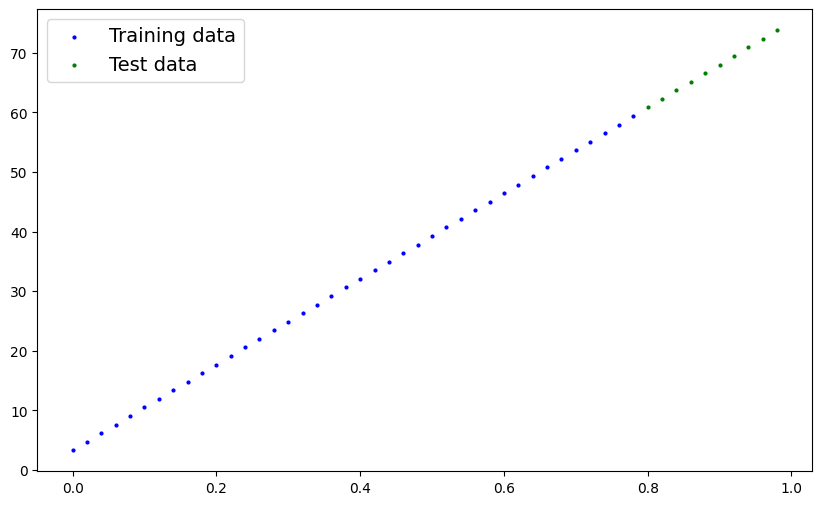

In [4]:
import matplotlib.pyplot as plt


def plot_prediction(
        train_data=X_train,
        train_label=Y_train,
        test_data=X_test,
        test_label=Y_test,
        predictions=None):
    plt.figure(figsize=(10, 6))
    #Plot training data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    #Plot testing data in green
    plt.scatter(test_data, test_label, c="g", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()


plot_prediction();

BUILD MODEL

In [ ]:
from torch import nn


#Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [ ]:
#random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
model_0.state_dict()

In [ ]:
with torch.inference_mode():
    Y_preds = model_0(X_test)

print(Y_preds)
plot_prediction(predictions=Y_preds)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
epochs = 200
epochs_counter = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()

Y_preds = model_0(X_train)  # 1 forward pass
loss = loss_fn(Y_preds, Y_train)  # 2 calculate the loss
optimizer.zero_grad()  # 3 optimizer zero grad
loss.backward()  # perform backpropagation on the loss wrt parameter of the model
optimizer.step()  # step the optimizer
model_0.eval()

with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds, Y_test)

if epoch % 10 == 0:
    epochs_counter.append(epoch)
loss_values.append(loss)
test_loss_values.append(test_loss)
print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

In [ ]:
import numpy as np

plt.plot(epochs_counter, np.array(torch.tensor(loss_values).numpy()), label="Training Loss")
plt.plot(epochs_counter, test_loss_values, label="Testing Loss")
plt.title("Training and Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_prediction(predictions=y_preds)

In [ ]:
model_0.state_dict()


**Ending**

In [63]:
import torch

#Create
weight = 71.9
bias = 3.3

#Create range value
start = 0
end = 1
step = 0.02

#Create x and y
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[ 3.3000],
         [ 4.7380],
         [ 6.1760],
         [ 7.6140],
         [ 9.0520],
         [10.4900],
         [11.9280],
         [13.3660],
         [14.8040],
         [16.2420]]))

In [64]:
#Split data
train_split = int(0.8 * len(x))
X_train, Y_train = x[:train_split], y[:train_split]
X_test, Y_test = x[train_split:], y[train_split:]
len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

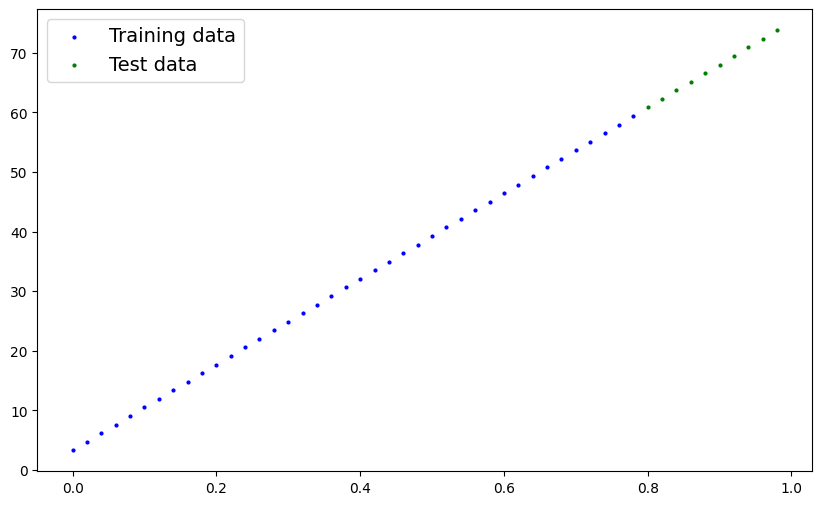

In [65]:
#Plot data
plot_prediction(X_train, Y_train, X_test, Y_test)

In [66]:
#pytorch linear model
from torch import nn


class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()

        #Use nn.Linear()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(42)
model_2 = LinearRegressionModel2()
model_2, model_2.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [67]:
next(model_2.parameters()).device

device(type='cpu')

In [68]:
model_2.to(device=torch.device('cuda'))
next(model_2.parameters()).device

device(type='cuda', index=0)

In [69]:
#Trainig
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

torch.manual_seed(42)
epochs = 6000
X_train = X_train.to('cuda')
Y_train = Y_train.to('cuda')
X_test = X_test.to('cuda')
Y_test = Y_test.to('cuda')

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test)
        test_loss = loss_fn(test_pred, Y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 30.21282386779785 | Test Loss: 65.64584350585938
Epoch: 10 | Loss: 29.06072425842285 | Test Loss: 64.29875183105469
Epoch: 20 | Loss: 27.90862464904785 | Test Loss: 62.9516487121582
Epoch: 30 | Loss: 26.806772232055664 | Test Loss: 61.63454818725586
Epoch: 40 | Loss: 25.755346298217773 | Test Loss: 60.3425407409668
Epoch: 50 | Loss: 24.79402732849121 | Test Loss: 59.0963249206543
Epoch: 60 | Loss: 23.879499435424805 | Test Loss: 57.88118362426758
Epoch: 70 | Loss: 23.007226943969727 | Test Loss: 56.6867561340332
Epoch: 80 | Loss: 22.21442222595215 | Test Loss: 55.54499435424805
Epoch: 90 | Loss: 21.452350616455078 | Test Loss: 54.424659729003906
Epoch: 100 | Loss: 20.745452880859375 | Test Loss: 53.336456298828125
Epoch: 110 | Loss: 20.084758758544922 | Test Loss: 52.286376953125
Epoch: 120 | Loss: 19.45413589477539 | Test Loss: 51.25263595581055
Epoch: 130 | Loss: 18.881460189819336 | Test Loss: 50.26869201660156
Epoch: 140 | Loss: 18.32280158996582 | Test Loss: 49.29

In [70]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[71.8190]], device='cuda:0')),
             ('linear_layer.bias', tensor([3.2953], device='cuda:0'))])

In [72]:
weight, bias

(71.9, 3.3)

In [74]:
model_2.eval()

with torch.inference_mode():
    y_pred = model_2(X_test)
print(y_pred)

tensor([[60.7505],
        [62.1869],
        [63.6233],
        [65.0597],
        [66.4961],
        [67.9325],
        [69.3688],
        [70.8052],
        [72.2416],
        [73.6780]], device='cuda:0')


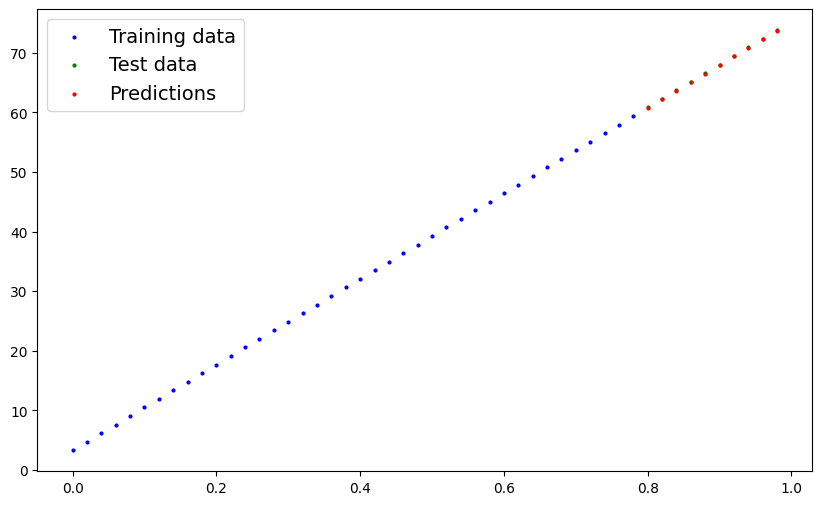

In [77]:
plot_prediction(predictions=y_pred.to('cpu'))

In [84]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch-workflow_model1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
print(MODEL_SAVE_PATH)
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

models\pytorch-workflow_model1.pth


In [92]:
loaded_model_2 = LinearRegressionModel2()
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device=torch.device('cuda'))
loaded_model_2.state_dict()
loaded_model_2.eval()
with torch.inference_mode():
    loaded_model_2_pred=loaded_model_2(X_test)
print(y_pred == loaded_model_2_pred)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
